<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/03-1-Procesado-Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
  <tr>
    <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
      <img src="https://i.imgur.com/nt7hloA.png" width="100">
    </td>
    <td style="width: 2px; text-align: center;">
      <font color="#0030A1" size="7">|</font><br>
      <font color="#0030A1" size="7">|</font>
    </td>
    <td>
      <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
        <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
      </font></p>
      <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
        Aprendizaje Automático Inicial &bull; Preprocesado de Datos
      </font></p>
      <p style="font-style: oblique;"><font color="#0030A1" size="3">
        Andrés Merino &bull; Periodo 2025-02
      </font></p>
    </td>
  </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

En este notebook se presentarán las técnicas de preprocesado más utilizadas en aprendizaje automático:

- Normalización y estandarización de datos.
- Discretización de variables continuas.
- One-Hot Encoding de variables categóricas.
- Reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA).

Los paquetes necesarios son:

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

---
## <font color='264CC7'> Cargar el conjunto de datos Iris </font>


In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---
## <font color='264CC7'> Normalización (escalado) </font>

Tenemos varias técnicas de normalización, las más comunes son:
- Normalización por el máximo:
  $$ x_i' = \frac{x_i}{x_{\max}} $$
  pero cuando esto sea positivo

  
- Normalización por la diferencia (min-max):
  $$ x_i' = \frac{x_i - x_{\min}}{x_{\max} - x_{\min}} $$
- Normalización basada en la media y desviación estándar (Estandarización):
  $$ x_i' = \frac{x_i - \mu}{\sigma} $$
  donde $\mu$ es la media y $\sigma$ la desviación estándar de la variable.


In [4]:
min_max_scaler= MinMaxScaler()
min_max_scaler.fit(X) # Q SE AJUSTE A LSO DATOS DE X
min_max_scaler.data_min_

array([4.3, 2. , 1. , 0.1])

In [ ]:
# Normalización por el máximo
x_max = X.max()
X_max_normalized = X / x_max
print("Normalización por el máximo:\n")
display(X_max_normalized.head())

# Normalización Min-Max
min_max_scaler = MinMaxScaler()
X_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
print("Normalización Min-Max:\n")
display(X_min_max_normalized.head())

# Estandarización
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
print("Estandarización:\n")
display(X_standardized.head())

Normalización por el máximo:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08


Normalización Min-Max:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Estandarización:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


---
## <font color='264CC7'> Discretización (Binning) </font>

Se tienen dos métodos principales para discretizar variables continuas:
- Igual amplitud: Divide el rango de la variable en intervalos de igual tamaño.
- Igual frecuencia: Divide los datos en intervalos que contienen aproximadamente el mismo número de muestras.


In [ ]:
# Igual amplitud
kbins_amplitude = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned_amplitude = pd.DataFrame(kbins_amplitude.fit_transform(X[['sepal length (cm)']]), columns=['sepal length (cm) binned'])
print("Los rangos de los bins (igual amplitud):", kbins_amplitude.bin_edges_[0])
print("Cantidad de muestras por bin (igual amplitud):", pd.Series(X_binned_amplitude['sepal length (cm) binned']).value_counts().sort_index().values, "\n")

# Igual frecuencia
kbins_frequency = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X_binned_frequency = pd.DataFrame(kbins_frequency.fit_transform(X[['sepal length (cm)']]), columns=['sepal length (cm) binned'])
print("Los rangos de los bins (igual frecuencia):", kbins_frequency.bin_edges_[0])
print("Cantidad de muestras por bin (igual frecuencia):", pd.Series(X_binned_frequency['sepal length (cm) binned']).value_counts().sort_index().values)

Los rangos de los bins (igual amplitud): [4.3 5.5 6.7 7.9]
Cantidad de muestras por bin (igual amplitud): [52 70 28] 

Los rangos de los bins (igual frecuencia): [4.3 5.4 6.3 7.9]
Cantidad de muestras por bin (igual frecuencia): [46 53 51]


---
## <font color='264CC7'> One-Hot Encoding </font>

Se basa en convertir cada categoría de una variable categórica en una nueva columna binaria (0 o 1), donde 1 indica la presencia de esa categoría.

<img src="https://substackcdn.com/image/fetch/$s_!6PUN!,f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fa8274ebc-146a-40b6-aaed-733b93943788_1871x816.png" alt="Imagen One-hot encoding" style="max-width:500px; height:auto;">

In [ ]:
# One-hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
species_onehot = pd.DataFrame(onehot_encoder.fit_transform(y.values.reshape(-1, 1)), columns=[f'species_{cat}' for cat in onehot_encoder.categories_[0]])
print("One-Hot Encoding de la variable objetivo 'species':\n")
display(species_onehot.head())

One-Hot Encoding de la variable objetivo 'species':



,species_0,species_1,species_2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


---
## <font color='264CC7'> Reducción de dimensionalidad </font>

Todo problema tiene dos dimensiones importantes: la cantidad de datos (número de muestras) y la cantidad de características (dimensionalidad).

Podemos reducir la dimensionalidad de reduciendo el número de atributos o el número de muestras. En este caso, nos enfocaremos en reducir el número de atributos.

Podemos aplicar Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del conjunto de datos mientras se conserva la mayor cantidad de varianza posible. Primero debemos revisar la varianza explicada por cada componente principal para decidir cuántos componentes conservar.

Varianza explicada por cada componente principal:
 [0.72962445 0.22850762 0.03668922 0.00517871]


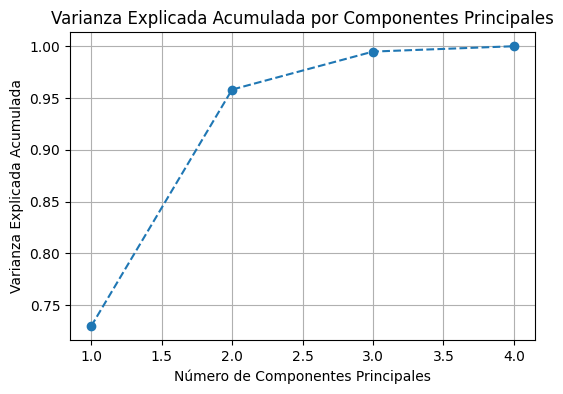

In [ ]:
# Varianza explicada por cada componente principal
pca = PCA()
pca.fit(X_standardized)
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:\n", explained_variance)

# Grafico de la varianza explicada acumulada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid()
plt.show()

Con esto, generamos las dos primeras componentes principales y las visualizamos.

In [ ]:
# Usar las features escaladas por StandardScaler para PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_standardized)
X_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
print("Componentes principales (PCA):\n")
display(X_pca_df.head())

Componentes principales (PCA):



,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Tomar únicamente la mitad de los datos del conjunto original y repetir la normalización y discretización. Comparar los resultados con los obtenidos con el conjunto completo.
</div>

---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realizar la discretización utilizando otro número de bins y comparar los resultados.
</div>

---

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;" >
<strong>Ejercicio:</strong><br>
Realizar un gráfico de dispersión (scatter plot) de las dos primeras componentes principales, coloreando los puntos según la variable objetivo `species`.
</div>

---



EJERICIO 1



In [5]:
# Seleccionar aleatoriamente el 50% de las filas
df_half = df.sample(frac=0.5, random_state=42)

df_half.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [6]:
X_half = df_half.drop(columns=['species'])

# Normalización por el máximo
x_max_half = X_half.max()
X_max_normalized_half = X_half / x_max_half
print("Normalización por el máximo (df_half):\n")
display(X_max_normalized_half.head())

# Normalización Min-Max
min_max_scaler_half = MinMaxScaler()
X_min_max_normalized_half = pd.DataFrame(min_max_scaler_half.fit_transform(X_half), columns=X_half.columns)
print("Normalización Min-Max (df_half):\n")
display(X_min_max_normalized_half.head())

# Estandarización
standard_scaler_half = StandardScaler()
X_standardized_half = pd.DataFrame(standard_scaler_half.fit_transform(X_half), columns=X_half.columns)
print("Estandarización (df_half):\n")
display(X_standardized_half.head())

Normalización por el máximo (df_half):



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.772152,0.636364,0.681159,0.48
18,0.721519,0.863636,0.246377,0.12
118,0.974684,0.590909,1.000000,0.92
78,0.759494,0.659091,0.652174,0.60
76,0.860759,0.636364,0.695652,0.56


Normalización Min-Max (df_half):



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.485714,0.333333,0.627119,0.458333
1,0.371429,0.750000,0.118644,0.083333
2,0.942857,0.250000,1.000000,0.916667
3,0.457143,0.375000,0.593220,0.583333
4,0.685714,0.333333,0.644068,0.541667


Estandarización (df_half):



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.316734,-0.688307,0.604677,0.104139
1,-0.168063,1.453728,-1.052477,-1.067428
2,2.255919,-1.116714,1.819923,1.536056
3,0.195535,-0.474104,0.494200,0.494662
4,1.165127,-0.688307,0.659915,0.364488


EJERCICIO 2



In [8]:
# Igual amplitud
kbins_amplitude = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_binned_amplitude = pd.DataFrame(kbins_amplitude.fit_transform(X_half[['sepal length (cm)']]), columns=['sepal length (cm) binned'])
print("Los rangos de los bins (igual amplitud) para df_half:", kbins_amplitude.bin_edges_[0])
print("Cantidad de muestras por bin (igual amplitud) para df_half:", pd.Series(X_binned_amplitude['sepal length (cm) binned']).value_counts().sort_index().values, "\n")

# Igual frecuencia
kbins_frequency = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X_binned_frequency = pd.DataFrame(kbins_frequency.fit_transform(X_half[['sepal length (cm)']]), columns=['sepal length (cm) binned'])
print("Los rangos de los bins (igual frecuencia) para df_half:", kbins_frequency.bin_edges_[0])
print("Cantidad de muestras por bin (igual frecuencia) para df_half:", pd.Series(X_binned_frequency['sepal length (cm) binned']).value_counts().sort_index().values)

Los rangos de los bins (igual amplitud) para df_half: [4.4        5.56666667 6.73333333 7.9       ]
Cantidad de muestras por bin (igual amplitud) para df_half: [29 37  9] 

Los rangos de los bins (igual frecuencia) para df_half: [4.4 5.4 6.2 7.9]
Cantidad de muestras por bin (igual frecuencia) para df_half: [23 26 26]


In [9]:
# Usar las features escaladas por StandardScaler para PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_standardized_half)
X_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
print("Componentes principales (PCA):\n")
display(X_pca_df.head())

Componentes principales (PCA):



,PC1,PC2
0,0.780316,-0.459101
1,-1.735801,1.115241
2,3.406391,0.117148
3,0.806603,-0.287270
4,1.394628,-0.088848


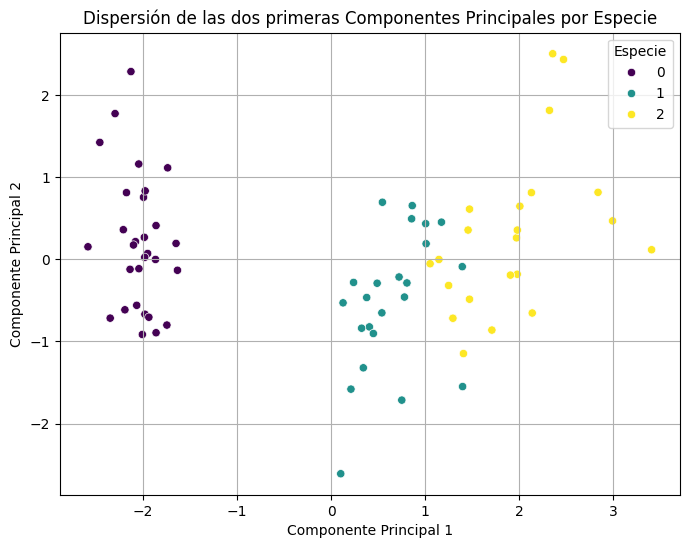

In [11]:
import seaborn as sns

X_pca_df['species'] = df_half['species'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=X_pca_df, palette='viridis')
plt.title('Dispersión de las dos primeras Componentes Principales por Especie')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especie')
plt.grid(True)
plt.show()